# 'Reproducing' the Third Figure from the Lunch Talk (with Unresolved Multiplicity) (No additional IFMR) With SalPeter used.
In this test notebook, I will examine the code that should create the juxtaposed KLF's of stars from the Galacitc Center and from their MIST and BPASS cluster counterparts. Final product should be similar to Figure 1 in Lu et al. 2013.

Firstly, I grab some code from the  jlu_python/jlu/papers/lu_gc_imf.py directory in the Moving Universe Lab's computers.

In [1]:
# After spending a bit of time figuring out how pickling files and loading works
# I have finally done it.

# These come from 
import pickle
import sys
from spisea import evolution

class dat:
    datin = "Description: Container of Data"

def load_klf_by_radius(rmin=0, rmax=30, mask_for_log=False):
    pickleFile = ('%sklf_r_%.1f_%.1f.dat' %
                  ('/Users/jlu/work/gc/imf/klf/current/', rmin, rmax))
    _in = open(pickleFile, 'rb')
    d = dat()
    d.Kp = pickle.load(_in,encoding='bytes')
    d.N = pickle.load(_in, encoding='bytes')
    d.eN = pickle.load(_in, encoding='bytes')

    d.N_ext = pickle.load(_in, encoding='bytes')
    d.eN_ext = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')

    d.KLF = pickle.load(_in, encoding='bytes')
    d.eKLF = pickle.load(_in, encoding='bytes')

    d.KLF_ext = pickle.load(_in,
                            encoding='bytes')
    d.eKLF_ext = pickle.load(_in,
                             encoding='bytes')

    d.KLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_im = pickle.load(_in,
                                      encoding='bytes')
    d.eKLF_ext_cmp_sp_im = pickle.load(_in,
                                       encoding='bytes')

    d.N_noWR = pickle.load(_in, encoding='bytes')
    d.eN_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eN_ext_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_noWR = pickle.load(_in,
                                      encoding='bytes')
    d.eN_ext_cmp_sp_noWR = pickle.load(_in,
                                       encoding='bytes')

    d.N_ext_cmp_sp_im_noWR = pickle.load(_in,
                                         encoding='bytes')
    d.eN_ext_cmp_sp_im_noWR = pickle.load(_in,
                                          encoding='bytes')

    d.KLF_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_noWR = pickle.load(_in,
                                        encoding='bytes')
    d.eKLF_ext_cmp_sp_noWR = pickle.load(_in,
                                         encoding='bytes')

    d.KLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                           encoding='bytes')
    d.eKLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                            encoding='bytes')

    d.comp_spec_ext = pickle.load(_in, encoding='bytes')
    d.comp_imag_ext = pickle.load(_in, encoding='bytes')

    if mask_for_log:
        # Repair for zeros since we are plotting in semi-log-y
        d.eN = np.ma.masked_where(d.N <= 0, d.eN)
        d.N = np.ma.masked_where(d.N <= 0, d.N)

        d.eN_ext = np.ma.masked_where(d.N_ext <= 0, d.eN_ext)
        d.N_ext = np.ma.masked_where(d.N_ext <= 0, d.N_ext)

        d.eN_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                             0, d.eN_ext_cmp_sp)
        d.N_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                            0, d.N_ext_cmp_sp)

        d.eN_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                                0, d.eN_ext_cmp_sp_im)
        d.N_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                               0, d.N_ext_cmp_sp_im)
        
        d.eKLF = np.ma.masked_where(d.KLF <= 0, d.eKLF)
        d.KLF = np.ma.masked_where(d.KLF <= 0, d.KLF)
        
        d.eKLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                        d.eKLF_ext)
        d.KLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                       d.KLF_ext)
        
        d.eKLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                               d.eKLF_ext_cmp_sp)
        d.KLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                              d.KLF_ext_cmp_sp)
        
        d.eKLF_ext_cmp_sp_im = (np.ma.
                                masked_where(d.KLF_ext_cmp_sp_im <=
                                             0, d.eKLF_ext_cmp_sp_im))
        d.KLF_ext_cmp_sp_im = (np.ma.
                               masked_where(d.KLF_ext_cmp_sp_im <=
                                            0, d.KLF_ext_cmp_sp_im))


    _in.close()

    return d

The following line loads data from /Users/jlu/work/gc/imf/klf/current/klf_r_0.0_30.0.dat. Recall I use the noWR option as the corresponding figure 

In [2]:
import numpy as np
result = load_klf_by_radius(mask_for_log=True)
magBin = result.Kp[1] - result.Kp[0]
# Note that the < 16 comes from the original code!
idx = np.where(result.Kp < 16)[0]

Now, I create the BPASS isochrone for that specific age. $10^{6.78}$  years of age (around 6 million years). From that isochrone, I will create a cluster using an IMF of $\alpha = 1.7$.

In [3]:
from spisea import synthetic
BPASS_iso = synthetic.Isochrone_Binary(6.78, 2.7,
                                       8000, 0.0, filters=['nirc2,Kp'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1794: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=3.50 for T= 26935 logg=3.29
Changing to T= 50000 for T= 50518 logg=3.84
Changing to logg=5.00 for T= 50518 logg=3.84
Changing to T= 50000 for T=168628 logg=5.83
Changing to logg=5.00 for T=168628 logg=5.83
Changing to logg=3.50 for T= 27821 logg=3.39
Changing to T= 50000 for T=166073 logg=5.80
Changing to logg=5.00 for T=166073 logg=5.80
Changing to T= 50000 for T=162596 logg=5.78
Changing to logg=5.00 for T=162596 logg=5.78
Changing to logg=3.00 for T= 23226 logg=2.95
Changing to T= 50000 for T=169071 logg=5.83
Changing to logg=5.00 for T=169071 logg=5.83
Changing to T= 50000 for T=166855 logg=5.80
Changing to logg=5.00 for T=166855 logg=5.80
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=143840 logg=5.56
Changing to logg=5.00 for T=143840 logg=5.56
Changing to T= 50000 for T=113794 logg=5.39
Changing to logg=5.00 for T=113794 logg=5.39
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.

In [4]:
from spisea import imf, ifmr, evolution
import numpy as np
# If we want to use control group, let's use multiplicity = None.
custom_IMF = imf.imf.IMF_broken_powerlaw(np.array([1, 150]),
                                         np.array([-2.35]),
                                         multiplicity=
                                         (imf.multiplicity.
                                          MultiplicityUnresolved()))
import time
t1 = time.time()
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=None)
t2 = time.time()
t_time = t2 - t1

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:739: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


In [5]:
len(BPASS_Cluster.star_systems)

215385

In [6]:
BPASS_Cluster.star_systems[np.where(~np.isnan(BPASS_Cluster.star_systems['mass_current']))]

mass,systemMass,Teff,L,logg,isWR,mass_current,phase,touchedP,metallicity,isMultiple,merged,m_nirc2_Kp
float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,float64,float64
30.719390469091525,50.14726594792002,31200.355229508434,1.630885469515078e+31,3.9916725654632983,1.0,17.15218306986322,5.0,False,0.0,True,0.0,13.51841386577755
14.588260017017516,25.48614396948627,19520.641920365186,4.764795744777343e+29,4.270159654445274,0.0,6.238364099232882,5.0,False,0.0,True,0.0,15.70692274359173
1.182511972347982,2.245266029739172,5795.727433961077,3.9950605764027465e+26,4.463145141966783,0.0,1.06275405739119,5.0,False,0.0,True,0.0,19.85875019819622
1.3352919632759228,2.5233674062027256,6031.713950305166,6.851445494236285e+26,4.340277094708663,0.0,1.1880754429268028,5.0,False,0.0,True,0.0,19.37558278147622
18.521129774621233,32.18931343762971,19771.39370152126,5.36539755304191e+29,4.267282276136167,0.0,6.387450102170687,5.0,False,0.0,True,0.0,15.540773491606057
1.281606479878233,2.4391542904097467,5967.152285677618,6.112493492099231e+26,4.375770639109994,0.0,1.1575478105315138,5.0,False,0.0,True,0.0,19.53238495740926
1.3768965102454669,2.7383048651091,6340.271985254647,1.1415555332444532e+27,4.266579124084851,0.0,1.3614083548636333,5.0,False,0.0,True,0.0,18.96462347940774
10.598268217421777,11.743156717664498,6077.232075070298,8.565908865569136e+26,4.483589848215364,0.0,1.1448885002427196,5.0,False,0.0,True,0.0,19.699460543839578
20.016855174494577,31.524799028351723,25117.388481763126,2.322560530187991e+30,4.208720094725706,0.0,9.756648497365477,5.0,False,0.0,True,0.0,14.993999163343329


In [7]:
len(np.where(~np.isnan(BPASS_Cluster.star_systems['mass_current']))[0])

161805

In [8]:
len(np.where(np.isnan(BPASS_Cluster.star_systems['mass_current']))[0])

53580

In [9]:
BPASS_Cluster.star_systems[np.where(np.isnan(BPASS_Cluster.star_systems['mass_current']))[0]]

mass,systemMass,Teff,L,logg,isWR,mass_current,phase,touchedP,metallicity,isMultiple,merged,m_nirc2_Kp
float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,float64,float64
13.317676001176897,25.33990274923898,nan,nan,nan,0.0,nan,-63.0,False,0.0,True,0.0,15.175210886951946
3.826970547925784,4.854432991454775,nan,nan,nan,0.0,nan,-46.0,False,0.0,True,0.0,nan
3.405141551440603,6.37718619039146,nan,nan,nan,0.0,nan,-37.0,False,0.0,True,0.0,18.22579345104421
1.9526805972700314,3.6103325181973602,nan,nan,nan,0.0,nan,-45.0,False,0.0,True,0.0,19.248915080584933
2.7117669120484575,4.760107639544721,nan,nan,nan,0.0,nan,-91.0,False,0.0,True,0.0,18.913264126472598
2.253029229481757,3.3893796928890527,nan,nan,nan,0.0,nan,-93.0,False,0.0,True,0.0,20.41934047857118
9.79631443192244,18.284954902202486,nan,nan,nan,0.0,nan,-65.0,False,0.0,True,0.0,15.996363106200276
9.965283992932681,12.723008762594935,nan,nan,nan,0.0,nan,-75.0,False,0.0,True,0.0,18.35205399325243
1.653623767633392,2.865266572582436,nan,nan,nan,0.0,nan,-15.0,False,0.0,True,0.0,20.090480818828567


In [10]:
len(BPASS_Cluster.companions)

66433

In [11]:
BPASS_Cluster.companions[np.where(np.isnan(BPASS_Cluster.companions['mass_current']))]

system_idx,mass,Teff,L,logg,isWR,mass_current,phase,touchedP,metallicity,isMultiple,merged,m_nirc2_Kp,log_a,e,i,Omega,omega
int64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,float64,float64,float64,float64,float64,float64,float64
1,1.027462443528991,nan,nan,nan,nan,nan,nan,False,0.0,False,0.0,nan,-1.366810096946883,nan,nan,nan,nan
39,39.234827565564245,nan,nan,nan,nan,nan,nan,False,0.0,False,nan,nan,nan,nan,nan,nan,nan
53,40.03836242152963,nan,nan,nan,nan,nan,nan,False,0.0,False,nan,nan,nan,nan,nan,nan,nan
149,1.0335520449558429,nan,nan,nan,nan,nan,nan,False,0.0,False,0.0,nan,0.4765492662311954,nan,nan,nan,nan
159,1.0344307058826085,nan,nan,nan,nan,nan,nan,False,0.0,False,0.0,nan,1.0400653629626213,nan,nan,nan,nan
221,1.0113524779461442,nan,nan,nan,nan,nan,nan,False,0.0,False,0.0,nan,nan,nan,nan,nan,nan
229,1.0117484299027102,nan,nan,nan,nan,nan,nan,False,0.0,False,0.0,nan,0.33720293461338813,nan,nan,nan,nan
236,1.027587808951362,nan,nan,nan,nan,nan,nan,False,0.0,False,0.0,nan,-0.9760065589579318,nan,nan,nan,nan
273,38.73134209526127,nan,nan,nan,nan,nan,nan,False,0.0,False,nan,nan,nan,nan,nan,nan,nan


In [12]:
BPASS_Cluster.companions[np.where(~np.isnan(BPASS_Cluster.companions['mass_current']))]

system_idx,mass,Teff,L,logg,isWR,mass_current,phase,touchedP,metallicity,isMultiple,merged,m_nirc2_Kp,log_a,e,i,Omega,omega
int64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,float64,float64,float64,float64,float64,float64,float64
0,12.022226748062083,26183.196085399984,4.82310492001751e+30,4.042562506940873,0.0,11.999081664422821,5.0,False,0.0,False,1.0,15.175210886951946,-1.0601266968789484,nan,nan,nan,nan
2,16.799687264181543,29346.755267416447,1.5771358093804801e+31,3.870638274778859,0.0,16.704157443732434,5.0,False,0.0,False,0.0,14.195151059143557,-0.3212866415095126,nan,nan,nan,nan
2,2.6281882146469506,10810.174016679726,1.8844393419177126e+28,4.277308056652733,0.0,2.6281882146469506,5.0,False,0.0,False,0.0,18.449347445918583,nan,nan,nan,nan,nan
3,2.972044638950857,11945.839359007477,2.988972510093135e+28,4.28795198370354,0.0,2.9720428378348833,5.0,False,0.0,False,0.0,18.22579345104421,-1.2746771425524281,nan,nan,nan,nan
4,1.6576519209273288,7559.440734913907,2.8716113855312654e+27,4.249657424787916,0.0,1.6576519209273288,5.0,False,0.0,False,0.0,19.248915080584933,-1.2763799878692486,nan,nan,nan,nan
5,2.0483407274962633,9016.827719039264,6.726031333163749e+27,4.280960540584169,0.0,2.0483407274962633,5.0,False,0.0,False,1.0,18.913264126472598,-1.4236028597500923,nan,nan,nan,nan
6,4.659507599907195,15787.51628892222,1.6056618044934537e+29,4.230973909091106,0.0,4.659367723007217,5.0,False,0.0,False,0.0,17.28043029827938,nan,nan,nan,nan,nan
6,6.23837635256156,18744.63391220442,4.697583418869415e+29,4.189038826572138,0.0,6.237182625667974,5.0,False,0.0,False,0.0,16.673311933015913,-0.26249160807445066,nan,nan,nan,nan
7,1.06275405739119,5680.543997546955,3.453193425726803e+26,4.486530105433307,0.0,1.06275405739119,5.0,False,0.0,False,0.0,20.65484434511368,0.022057105464142482,nan,nan,nan,nan


Then, I create the scaling factor we use to turn number of stars in a magnitude bin
to area (arcsecond^2) density of stars in a magnitude bin.

In [13]:
area = 150  # arcsec^2
# Think of how many stars per area would there be in a similar cluster
# but with lower mass. We use scaling.
scaleFactorBPS = ((17000 /
                   1e6) /
                  area)
print(scaleFactorBPS)

0.00011333333333333334


In [14]:
BPASS_iso.primaries['m_nirc2_Kp']

14.171958151287386
12.377572156719495
14.2820036371125
nan
18.58459952647219
nan
13.78326845961483
nan
27.022071739016784
13.42303513973753
20.045508204179747


In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual BPASS stars' magnitudes (not necessarily just of star systems)

In [15]:
totl_BPASS = (BPASS_Cluster.star_systems['m_nirc2_Kp']
               [np.where((BPASS_Cluster.star_systems['isWR']==0))[0]])

Below, I produce my first plot that demonstrates the problem with BPASS's IMF. I also set up bins and BPASS weights, which I will use in the next figure.

Text(0.5, 1.0, 'KLF of clusters at Age = 6 Myr (Using MultiplicityUnresolved and \n Using Salpeter 1955 IMF)')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


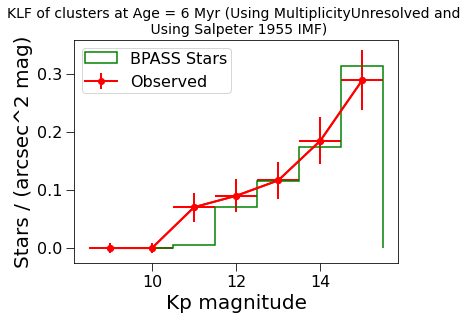

In [16]:
import matplotlib.pyplot as py
# Primary star fluxes
klf_mag_bins = np.arange(9.0, 17, 1.0)
binsKp = klf_mag_bins
binEdges = binsKp[0:-1] + (binsKp[1:] - binsKp[0:-1]) / 2.0

weightsBPS = np.array([1.0 for x in totl_BPASS])
weightsBPS *= scaleFactorBPS
(n1, b1, p1) = py.hist(totl_BPASS, bins=binEdges, weights=weightsBPS,
                       histtype='step', color='green',
                       label='BPASS Stars', align='mid',
                       linewidth=1.5)
py.errorbar(result.Kp[idx],
            result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, linewidth=2)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
            label='Observed')
py.legend(loc='upper left', numpoints=1)
py.xlabel('Kp magnitude')
py.ylabel('Stars / (arcsec^2 mag)')
py.title('KLF of clusters at Age = %d Myr (Using MultiplicityUnresolved and \n Using Salpeter 1955 IMF)' % (10**(6.78 - 6)),
         fontsize=14)

**Now I create the MIST v1 cluster and then make the final figure of the talk.**

In [17]:
MIST_iso = synthetic.IsochronePhot(6.78, 2.7, 8000, 0.0,
                                   min_mass = 1.0,
                                   max_mass = 150, recomp=False,
                                   filters=['nirc2,Kp'])
MIST_Cluster = synthetic.ResolvedCluster(MIST_iso, custom_IMF,
                                         1000000,
                                         ifmr=None)
Merged_iso = synthetic.IsochronePhot(6.78, 2.7, 8000, 0.0,
                                     evo_model=evolution.MergedBaraffePisaEkstromParsec(),
                                     min_mass = 1.0,
                                     max_mass = 150, recomp=False,
                                     filters=['nirc2,Kp'])
Merged_Clus = synthetic.ResolvedCluster(Merged_iso, custom_IMF,
                                         1000000,
                                         ifmr=None)

Changing to logg=4.00 for T= 31033 logg=3.85
Changing to logg=4.00 for T= 31139 logg=3.83
Changing to logg=4.00 for T= 31160 logg=3.82
Changing to logg=4.00 for T= 31179 logg=3.82
Changing to logg=4.00 for T= 31196 logg=3.81
Changing to logg=4.00 for T= 31210 logg=3.80
Changing to logg=4.00 for T= 31222 logg=3.80
Changing to logg=4.00 for T= 31231 logg=3.79
Changing to logg=4.00 for T= 31238 logg=3.79
Changing to logg=4.00 for T= 31242 logg=3.78
Changing to logg=4.00 for T= 31244 logg=3.77
Changing to logg=4.00 for T= 31244 logg=3.77
Changing to logg=4.00 for T= 31242 logg=3.76
Changing to logg=4.00 for T= 31238 logg=3.75
Changing to logg=4.00 for T= 31232 logg=3.75
Changing to logg=4.00 for T= 31224 logg=3.74
Changing to logg=4.00 for T= 31213 logg=3.73
Changing to logg=4.00 for T= 31200 logg=3.73
Changing to logg=4.00 for T= 31184 logg=3.72
Changing to logg=4.00 for T= 31167 logg=3.71
Changing to logg=4.00 for T= 31148 logg=3.70
Changing to logg=4.00 for T= 31129 logg=3.70
Changing t

In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual MIST stars' magnitudes (not necessarily just of star systems)

In [18]:
totl_mist = (MIST_Cluster.star_systems['m_nirc2_Kp']
             [np.where((MIST_Cluster.star_systems['isWR'] == 0))[0]])
totl_merged = (Merged_Clus.star_systems['m_nirc2_Kp']
               [np.where((Merged_Clus.star_systems['isWR'] == 0))[0]])
# Now find the magintudes of just the primary star

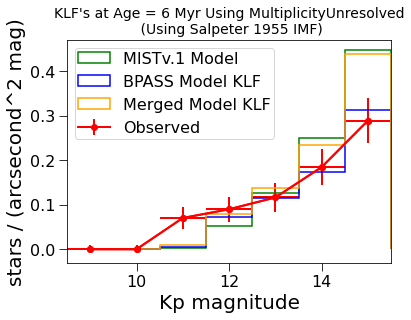

In [19]:
import matplotlib.pyplot as py

# Setting up framework so that I can scale the number of stars in mass bin
# into density: number of stars per square arcsecond.

# I won't be using the sum of initial masses of only existing stars for
# the scale factors
mist_scale = scaleFactorBPS
merged_scale = scaleFactorBPS

weights_MST = np.array([1.0 for x in totl_mist], dtype=np.float64)
weights_MST *= mist_scale
weights_merged = np.array([1.0 for x in totl_merged])
weights_merged *= merged_scale
# Binning the K' magnitudes into their respective bins

py.hist(totl_mist, bins=binEdges, histtype='step',
        weights=weights_MST, color='green', label='MISTv.1 Model',
        align='mid', linewidth=1.5)
py.hist(totl_BPASS, bins=binEdges, histtype='step',
        weights=weightsBPS, color='blue',
        label='BPASS Model KLF',
        align='mid', linewidth=1.5)
py.hist(totl_merged, bins=binEdges, histtype='step',
        weights=weights_merged, color='orange',
        label='Merged Model KLF',
        align='mid', linewidth=1.5)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, capsize=0, linewidth=2)
py.errorbar(result.Kp[idx],result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
       label='Observed')
py.xlim(8.5, 15.5)
py.xlabel('Kp magnitude')
py.ylabel("stars / (arcsecond^2 mag)")
py.title("KLF's at Age = %d Myr Using MultiplicityUnresolved" % (10**(6.78 - 6))+
         "\n (Using Salpeter 1955 IMF)", fontsize=14)
py.legend(loc='upper left', numpoints=1)
py.savefig("StillBadKLF1Salpt.png")

Now what is the joint distribution of primaries and secondaries pairs that did not interpolate mass_current properly?

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


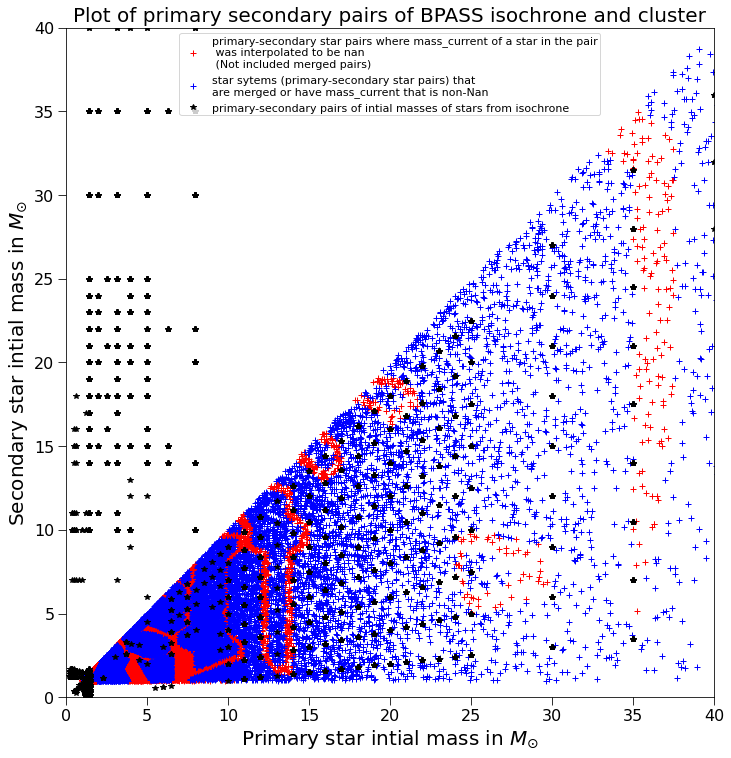

In [20]:
py.figure(figsize = (12, 12))
py.plot(BPASS_Cluster.rejected_prims,
        BPASS_Cluster.rejected_sec,
        "r+",  label="primary-secondary star pairs where " +
        "mass_current of a star in the pair\n " +
        "was interpolated to be nan \n (Not included merged pairs)")
py.plot(BPASS_Cluster.good_systems[:, 0],
        BPASS_Cluster.good_systems[:, 1],
        "b+", label="star sytems (primary-secondary star pairs) that \n" +
        "are merged or have mass_current that is non-Nan")
py.plot(BPASS_iso.primaries['mass'],
        BPASS_iso.secondaries['mass'],
        "k*", label="primary-secondary pairs of intial masses of stars from isochrone")
py.xlim(0, 40)
py.ylim(0, 40)
py.xlabel("Primary star intial mass in $M_{\odot}$")
py.ylabel("Secondary star intial mass in $M_{\odot}$")
py.title("Plot of primary secondary pairs of BPASS isochrone and cluster")
py.legend(prop={'size' : 11})
py.savefig("Scatter1SalptZoomed0.png")

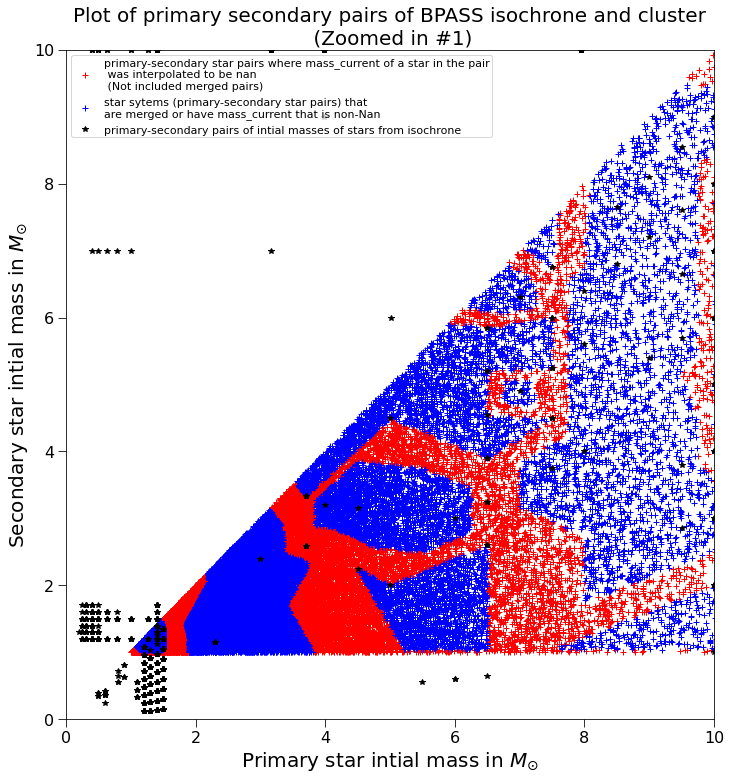

In [21]:
py.figure(figsize = (12, 12))
py.plot(BPASS_Cluster.rejected_prims,
        BPASS_Cluster.rejected_sec,
        "r+",  label="primary-secondary star pairs where " +
        "mass_current of a star in the pair\n " +
        "was interpolated to be nan \n (Not included merged pairs)")
py.plot(BPASS_Cluster.good_systems[:, 0],
        BPASS_Cluster.good_systems[:, 1],
        "b+", label="star sytems (primary-secondary star pairs) that \n" +
        "are merged or have mass_current that is non-Nan")
py.plot(BPASS_iso.primaries['mass'],
        BPASS_iso.secondaries['mass'],
        "k*", label="primary-secondary pairs of intial masses of stars from isochrone")
py.xlim(0, 10)
py.ylim(0, 10)
py.xlabel("Primary star intial mass in $M_{\odot}$")
py.ylabel("Secondary star intial mass in $M_{\odot}$")
py.title("Plot of primary secondary pairs of BPASS isochrone and cluster\n (Zoomed in #1)")
py.legend(prop={'size' : 11})
py.savefig("Scatter1SalptZoomed1.png")

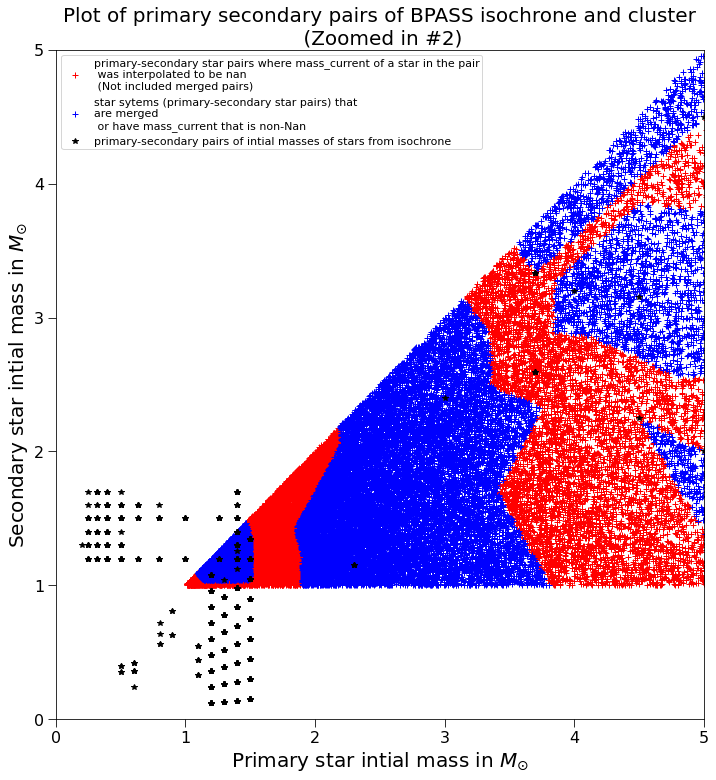

In [22]:
py.figure(figsize = (12, 12))
py.plot(BPASS_Cluster.rejected_prims,
        BPASS_Cluster.rejected_sec,
        "r+",  label="primary-secondary star pairs where " +
        "mass_current of a star in the pair\n " +
        "was interpolated to be nan \n (Not included merged pairs)")
py.plot(BPASS_Cluster.good_systems[:, 0],
        BPASS_Cluster.good_systems[:, 1],
        "b+", label="star sytems (primary-secondary star pairs) that \n" +
        "are merged\n or have mass_current that is non-Nan")
py.plot(BPASS_iso.primaries['mass'],
        BPASS_iso.secondaries['mass'],
        "k*", label="primary-secondary pairs of intial masses of stars from isochrone")
py.xlim(0, 5)
py.ylim(0, 5)
py.xlabel("Primary star intial mass in $M_{\odot}$")
py.ylabel("Secondary star intial mass in $M_{\odot}$")
py.title("Plot of primary secondary pairs of BPASS isochrone and cluster\n (Zoomed in #2)")
py.legend(prop={'size' : 11})
py.savefig("Scatter1SalptZoomed2.png")

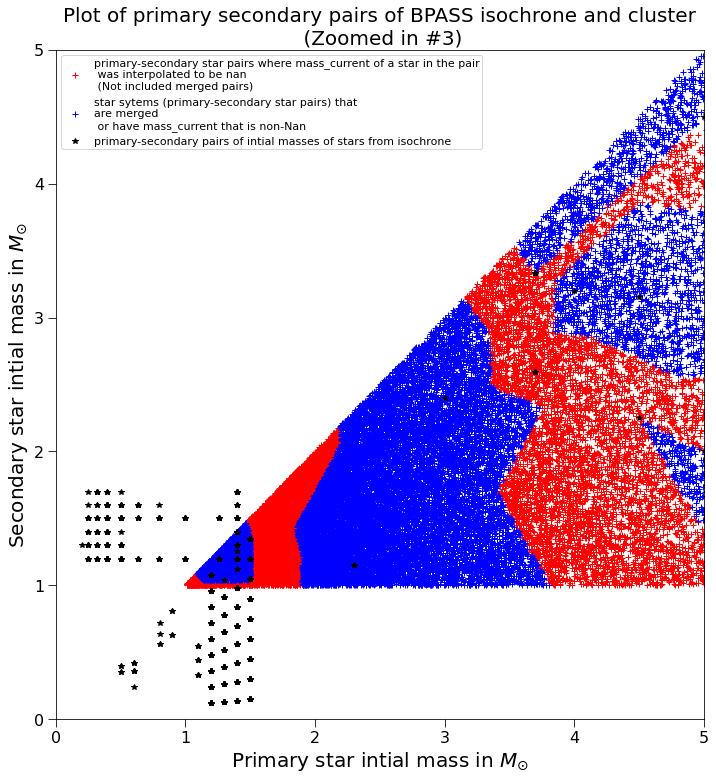

In [23]:
py.figure(figsize = (12, 12))
py.plot(BPASS_Cluster.rejected_prims,
        BPASS_Cluster.rejected_sec,
        "r+",  label="primary-secondary star pairs where " +
        "mass_current of a star in the pair\n " +
        "was interpolated to be nan \n (Not included merged pairs)")
py.plot(BPASS_Cluster.good_systems[:, 0],
        BPASS_Cluster.good_systems[:, 1],
        "b+", label="star sytems (primary-secondary star pairs) that \n" +
        "are merged\n or have mass_current that is non-Nan")
py.plot(BPASS_iso.primaries['mass'],
        BPASS_iso.secondaries['mass'],
        "k*", label="primary-secondary pairs of intial masses of stars from isochrone")
py.xlim(0, 5)
py.ylim(0, 5)
py.xlabel("Primary star intial mass in $M_{\odot}$")
py.ylabel("Secondary star intial mass in $M_{\odot}$")
py.title("Plot of primary secondary pairs of BPASS isochrone and cluster\n (Zoomed in #3)")
py.legend(prop={'size' : 11})
py.savefig("Scatter1SalptZoomed3.png")

Now trying to explore which stars had their logg interpolated properly and which did not.

In [24]:
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=None, tests='logg')

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:739: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


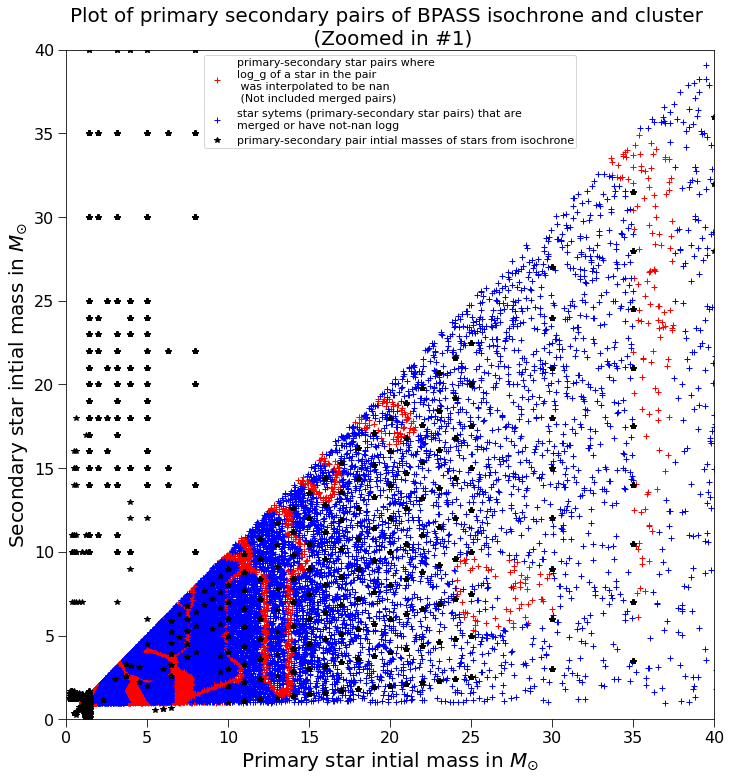

In [25]:
py.figure(figsize = (12, 12))
py.plot(BPASS_Cluster.rejected_prims,
        BPASS_Cluster.rejected_sec,
        "r+",  label="primary-secondary star pairs where \n" +
        "log_g of a star in the pair\n " +
        "was interpolated to be nan \n (Not included merged pairs)")
py.plot(BPASS_Cluster.good_systems[:, 0],
        BPASS_Cluster.good_systems[:, 1],
        "b+", label="star sytems (primary-secondary star pairs) that are \n" +
        "merged or have not-nan logg")
py.plot(BPASS_iso.primaries['mass'],
        BPASS_iso.secondaries['mass'],
        "k*", label="primary-secondary pair intial masses of stars from isochrone")
py.xlim(0, 40.0)
py.ylim(0, 40.0)
py.xlabel("Primary star intial mass in $M_{\odot}$")
py.ylabel("Secondary star intial mass in $M_{\odot}$")
py.title("Plot of primary secondary pairs of BPASS isochrone and cluster \n (Zoomed in #1)")
py.legend(prop={'size' : 11})
py.savefig("LoggScatterSalPt1.png")

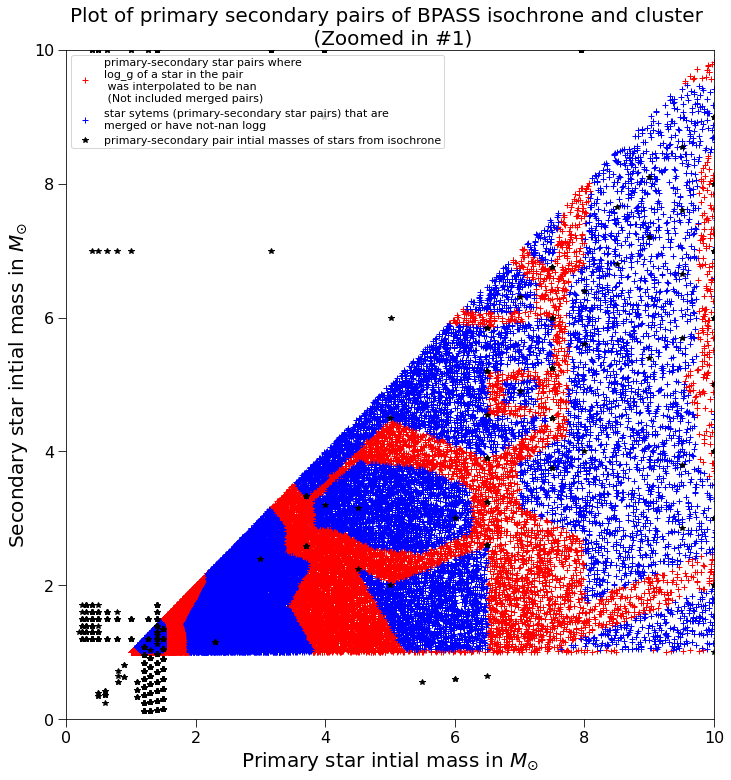

In [26]:
py.figure(figsize = (12, 12))
py.plot(BPASS_Cluster.rejected_prims,
        BPASS_Cluster.rejected_sec,
        "r+",  label="primary-secondary star pairs where \n" +
        "log_g of a star in the pair\n " +
        "was interpolated to be nan \n (Not included merged pairs)")
py.plot(BPASS_Cluster.good_systems[:, 0],
        BPASS_Cluster.good_systems[:, 1],
        "b+", label="star sytems (primary-secondary star pairs) that are \n" +
        "merged or have not-nan logg")
py.plot(BPASS_iso.primaries['mass'],
        BPASS_iso.secondaries['mass'],
        "k*", label="primary-secondary pair intial masses of stars from isochrone")
py.xlim(0, 10.0)
py.ylim(0, 10.0)
py.xlabel("Primary star intial mass in $M_{\odot}$")
py.ylabel("Secondary star intial mass in $M_{\odot}$")
py.title("Plot of primary secondary pairs of BPASS isochrone and cluster \n (Zoomed in #1)")
py.legend(prop={'size' : 11})
py.savefig("LoggScatterSalpt2.png")